In [1]:
from h5py import File
import pickle
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import NullLocator
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.colorbar as cbar
import matplotlib.colors as mcolors

In [2]:
with open("/root/code/paper_public/data/date_all.pkl","rb") as f:
    date_all = pickle.load(f)
with open("/root/code/paper_public/data/DIV_all.pkl","rb") as f:
    DIV_all = pickle.load(f)
with open("/root/code/paper_public/data/xy_all.pkl","rb") as f:
    xy_all = pickle.load(f)
with open("/root/code/paper_public/data/firingrate_all.pkl","rb") as f:
    firingrate_all = pickle.load(f)
with open("/root/code/paper_public/data/varspec_all.pkl","rb") as f:
    varspec_all = pickle.load(f)
with open("/root/code/paper_public/data/varspec_shuffle_all.pkl","rb") as f:
    varspec_shuffle_all = pickle.load(f)
with open("/root/code/paper_public/data/U_all.pkl","rb") as f:
    U_all = pickle.load(f)
with open("/root/code/paper_public/data/U_shuffle_all.pkl","rb") as f:
    U_shuffle_all = pickle.load(f)
with open("/root/code/paper_public/result/locality_all.pkl","rb") as f:
    locality_all = pickle.load(f)
with open("/root/code/paper_public/result/locality_shuffle_all.pkl","rb") as f:
    locality_shuffle_all = pickle.load(f)
with open("/root/code/paper_public/result/locality_slope_all.pkl","rb") as f:
    locality_slope_all = pickle.load(f)
with open("/root/code/paper_public/result/locality_slope_shuffle_all.pkl","rb") as f:
    locality_slope_shuffle_all = pickle.load(f)
with open("/root/code/paper_public/result/Dim_abe_all.pkl","rb") as f:
    Dim_abe_all = pickle.load(f)
with open("/root/code/paper_public/result/Dim_abe_shuffle_all.pkl","rb") as f:
    Dim_abe_shuffle_all = pickle.load(f)
with open("/root/code/paper_public/result/size_hist_all.pkl","rb") as f:
    size_hist_all = pickle.load(f)
with open("/root/code/paper_public/result/NA_abe_all.pkl","rb") as f:
    NA_abe_all = pickle.load(f)
with open("/root/code/paper_public/data/burstiness_all.pkl","rb") as f:
    burstiness_all = pickle.load(f)

Figure 1

3.0
7.0
11.0
15.0
19.0


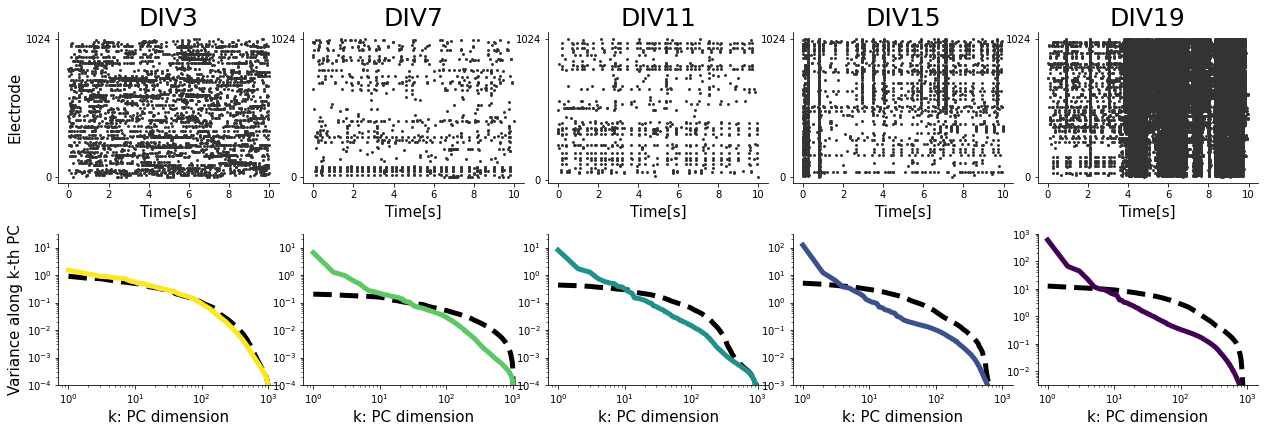

In [3]:
dish = "23312"
DIV_list = DIV_all[dish]
date_list = date_all[dish]
i_list = [1,2,6,10,14]
bin = 100

raster_time = 10 # [s]
times_list = []
channs_list = []

for i in range(len(i_list)):
    i_plot = i_list[i]
    date = date_list[i_plot]
    DIV = DIV_list[i_plot]
    print(DIV)
    
    path = f'/mnt/cerebellum/akita/development/data/{dish}/{date}/record.raw.h5'
    record = File(path)
    T = (record['data_store/data0000/stop_time'][0] - record['data_store/data0000/start_time'][0])/1000
    N = 1024
    times = np.array(pd.DataFrame(np.array(record['data_store/data0000/spikes']))['frameno']/20000)
    times -= times[0]
    channs = np.array(pd.DataFrame(np.array(record['data_store/data0000/spikes']))['channel'])
    
    nspike = np.sum(times < raster_time)
    times_list.append(times[:nspike])
    channs_list.append(channs[:nspike])


fig = plt.figure(figsize=(17,7))
ax1 = fig.add_axes([0.0, 0.45, 0.18, 0.3])
ax2 = fig.add_axes([0.2, 0.45, 0.18, 0.3])
ax3 = fig.add_axes([0.4, 0.45, 0.18, 0.3])
ax4 = fig.add_axes([0.6, 0.45, 0.18, 0.3])
ax5 = fig.add_axes([0.8, 0.45, 0.18, 0.3])
ax6 = fig.add_axes([0.0, 0.05, 0.18, 0.3])
ax7 = fig.add_axes([0.2, 0.05, 0.18, 0.3])
ax8 = fig.add_axes([0.4, 0.05, 0.18, 0.3])
ax9 = fig.add_axes([0.6, 0.05, 0.18, 0.3])
ax10 = fig.add_axes([0.8, 0.05, 0.18, 0.3])
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for i in range(5):
    ax = ax_list[i]
    i_plot = i_list[i]
    ax.scatter(times_list[i],channs_list[i], s=15, marker=".", c='#333333')
    ax.set_xlabel('Time[s]', fontsize=15)
    if i == 0:
        ax.set_ylabel('Electrode', fontsize=15)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticks([0,1024])
    ax.set_title(f'DIV{int(DIV_list[i_plot])}', fontsize=25)

x_axis = np.arange(1,1025)
for i in range(5,10):
    ax = ax_list[i]
    i_plot = i_list[i-5]
    
    ax.plot(x_axis, np.average(varspec_shuffle_all[dish][i_plot],axis=0), color='black',linewidth=5, linestyle='--')
    ax.plot(x_axis, varspec_all[dish][i_plot], color=cm.viridis_r((DIV_list[i_plot]-DIV_list[i_list[0]])/(DIV_list[i_list[-1]]-DIV_list[i_list[0]])),linewidth=5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('k: PC dimension', fontsize=15)
    if i == 5:
        ax.set_ylabel('Variance along k-th PC', fontsize=15)
    if i < 8:
        ax.set_ylim([1e-4,10**(1.5)])
    elif i == 8:
        ax.set_ylim([1e-3,10**(2.5)])
    else:
        ax.set_ylim([10**(-2.5),10**(3)])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
# plt.savefig("/root/code/paper_public/figs/fig1BD.eps")
plt.savefig("/root/code/paper_public/figs/fig1BD.png")
plt.show()

[-1.29735423]


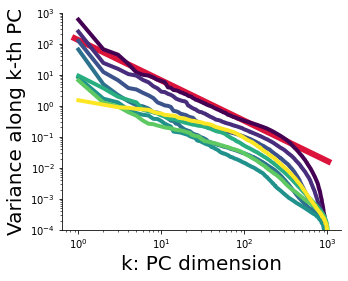

In [5]:
dish = "23312"

varspec_dish = varspec_all[dish]
DIV_dish = DIV_all[dish]
date_dish = date_all[dish]

i_list = [1,2,4,6,8,10,12,14]

fig, ax = plt.subplots(figsize=(5,4))

a, b, e = Dim_abe_all[dish][i_list[-1]]
print(a)
x_axis = np.arange(0.9, 1026, 1)
ax.plot(x_axis, 10**(b)*x_axis**a, c='crimson', linewidth=6)

x_axis = np.arange(1, 1025, 1)
for i in i_list[::-1]:
    ax.plot(x_axis, varspec_dish[i], label=int(DIV_dish[i]), color=cm.viridis(1-(DIV_dish[i]-3)/(19-3)), linewidth=4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k: PC dimension', fontsize=20)
ax.set_ylabel('Variance along k-th PC', fontsize=20)
# ax.set_xlim([10**(-0.1),2e3])
ax.set_ylim([1e-4,1e3])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(ncol=2, loc="upper right", frameon=False)
# plt.savefig("/root/code/paper_public/figs/fig1E.eps")
plt.show()

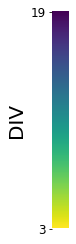

In [6]:
gradient = np.linspace(0, 1, 256)
gradient = np.stack((gradient, gradient))

fig, ax = plt.subplots()
ax.imshow(gradient.T, aspect=0.1, cmap=plt.cm.viridis)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
label_y = ['19', '3']
ax.set_yticks([0, 256], label_y, fontsize=12)
ax.set_ylabel('DIV', fontsize=20)
# plt.savefig("/root/code/paper_public/figs/Fig1colorbar.eps")
plt.show()

<ipython-input-8-792255d76418>:32: RuntimeWarning: invalid value encountered in divide
  err_mean_mvavg /= mvavg_counter
<ipython-input-8-792255d76418>:33: RuntimeWarning: invalid value encountered in divide
  exp_mean_mvavg /= mvavg_counter


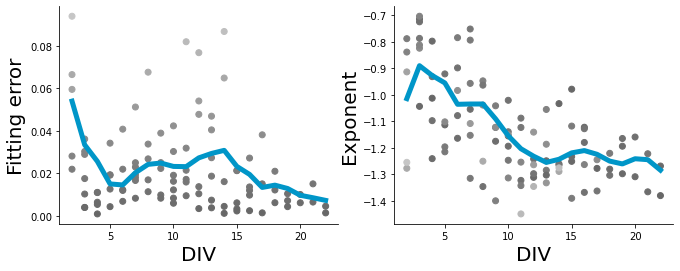

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
ax1, ax2 = axes
dish_list = ["19880","23312","23280","23311","23317","23302","23282"]
firingrate_thr = 0.03
DIV_min_plot = 0 # determine left limit
DIV_max_plot = 23 # right limit
window = 3 # window size for moving average
    
err_array = np.zeros((len(dish_list),DIV_max_plot-DIV_min_plot))
exp_array = np.zeros((len(dish_list),DIV_max_plot))
for d in range(len(dish_list)):
    dish = dish_list[d]
    DIV_list = DIV_all[dish]
    date_list = np.where((np.array(firingrate_all[dish]) > firingrate_thr) * (DIV_list < DIV_max_plot) * (DIV_list >= DIV_min_plot))[0]
    ax1.scatter([DIV_list[date] for date in date_list], [Dim_abe_all[dish][date][2] for date in date_list], c=[Dim_abe_all[dish][date][2] for date in date_list], cmap='gray', vmin=-0.1, vmax=0.15)
    ax2.scatter([DIV_list[date] for date in date_list], [Dim_abe_all[dish][date][0] for date in date_list], c=[Dim_abe_all[dish][date][2] for date in date_list], cmap='gray', vmin=-0.1, vmax=0.15)
    
    for date in date_list:
        err_array[d,int(DIV_list[date])-DIV_min_plot] = Dim_abe_all[dish][date][2]
        exp_array[d,int(DIV_list[date])-DIV_min_plot] = Dim_abe_all[dish][date][0]

date_ok = np.where(np.sum(err_array,axis=0)!=0)[0]
err_mean_mvavg = np.zeros(DIV_max_plot) # moving average
exp_mean_mvavg = np.zeros(DIV_max_plot) # moving average
mvavg_counter = np.zeros(DIV_max_plot)
for date in date_ok:
    err_mean_mvavg[max(0,date):date+window] += np.sum(err_array[err_array[:,date]!=0,date])
    exp_mean_mvavg[max(0,date):date+window] += np.sum(exp_array[exp_array[:,date]!=0,date])
    mvavg_counter[max(0,date):date+window] += np.sum(err_array[:,date]!=0)

err_mean_mvavg /= mvavg_counter
exp_mean_mvavg /= mvavg_counter

ax1.plot(np.arange(DIV_min_plot, DIV_max_plot)[date_ok], err_mean_mvavg[date_ok],linewidth=5, color='#0096C8')
ax2.plot(np.arange(DIV_min_plot, DIV_max_plot)[date_ok], exp_mean_mvavg[date_ok],linewidth=5, color='#0096C8')

ax1.set_xlabel("DIV", fontsize=20)
ax1.set_ylabel("Fitting error", fontsize=20)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks([5,10,15,20])

ax2.set_xlabel("DIV", fontsize=20)
ax2.set_ylabel("Exponent", fontsize=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks([5,10,15,20])

# plt.savefig("/root/code/paper_public/figs/fig1F.eps")
plt.show()

Figure 2

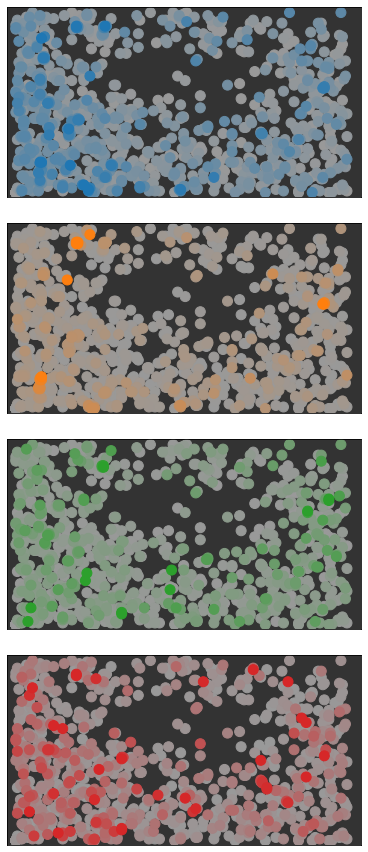

In [24]:
## 主成分重みの空間分布を可視化する
dish = "23312"
d = 4
U = U_all[dish][d]
xy = xy_all[dish][d]

fig = plt.figure(figsize=(12,12), facecolor='white')
ax1 = fig.add_axes([0, 0.75, 0.41, 0.22])
ax2 = fig.add_axes([0, 0.50, 0.41, 0.22])
ax3 = fig.add_axes([0, 0.25, 0.41, 0.22])
ax4 = fig.add_axes([0, 0.00, 0.41, 0.22])

pc_list = np.array([1,8,64,512]) - 1
ax_list = np.array([ax1,ax2,ax3,ax4])
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']

for i in range(len(pc_list)):
    pc = pc_list[i]
    ax = ax_list[i]
    z = np.abs(U[:,pc])
    ind = np.argsort(z)
    cmap = LinearSegmentedColormap.from_list("my_cmap", ["#999999",colors[i]])
    ax.scatter(xy[ind,0],xy[ind,1], vmin=0 , vmax=0.1, c=z[ind], cmap=cmap, s=100)
    ax.set_xlim([-100,4000])
    ax.set_ylim([-50,2150])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('#333333')
    
scalebar = ScaleBar(1, units="um", location='lower left', length_fraction=0.25)
# ax1.add_artist(scalebar)
# ax1.set_title(f'in vitro\nDIV{int(DIV_all[dish][d])}', fontsize=45)

fig.patch.set_alpha(0)
plt.savefig("/root/code/paper_public/figs/fig2B2.png", dpi=100)
plt.show()

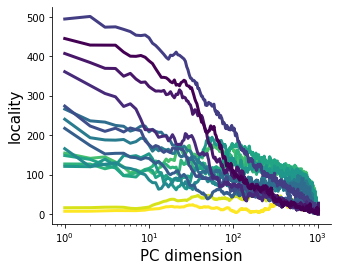

In [18]:
dish_list = ["19880","23312","23280","23311","23317","23302","23282"]
DIV_min_plot = 0 # determine left limit
DIV_max_plot = 23 # right limit

N = 1024
window = 10

locality_mvavg = np.zeros((len(dish_list), DIV_max_plot-DIV_min_plot, N))
mvavg_counter = np.zeros((len(dish_list), DIV_max_plot-DIV_min_plot, N))

for d in range(len(dish_list)):
    dish = dish_list[d]
    locality_dish = locality_all[dish]
    DIV_list = DIV_all[dish]
    date_list = np.where((DIV_list < DIV_max_plot) * (DIV_list >= DIV_min_plot))[0]
    
    for date in date_list:
        DIV = int(DIV_list[date])
        for w in range(window):
            locality_mvavg[d,DIV-DIV_min_plot,:N-w] += locality_dish[date][w:]
            mvavg_counter[d,DIV-DIV_min_plot,:N-w] += 1
        locality_mvavg[d,DIV-DIV_min_plot,:] /= mvavg_counter[d,DIV-DIV_min_plot,:]


fig, ax = plt.subplots(figsize=(5,4))
dish = dish_list[1]
DIV_list = DIV_all[dish]
for date in range(15):
    DIV = int(DIV_list[date])
    plt.plot(np.arange(1,N+1), locality_mvavg[1,DIV-DIV_min_plot,:], label=DIV, color=cm.viridis_r((DIV-2)/(19-2)),linewidth=3)
    
plt.xlabel('PC dimension', fontsize=15)
plt.ylabel(f'locality', fontsize=15)
plt.xscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(ncol=2, loc="upper right", frameon=False)

# plt.savefig("/root/code/paper_public/figs/fig2C.eps")
plt.show()

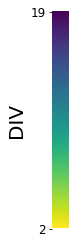

In [55]:
gradient = np.linspace(0, 1, 256)
gradient = np.stack((gradient, gradient))

fig, ax = plt.subplots()
ax.imshow(gradient.T, aspect=0.1, cmap=plt.cm.viridis)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
label_y = ['19', '2']
ax.set_yticks([0, 256], label_y, fontsize=12)
ax.set_ylabel('DIV', fontsize=20)
plt.show()

<ipython-input-19-71f396d89197>:33: RuntimeWarning: invalid value encountered in divide
  slope_mean_mvavg /= mvavg_counter
<ipython-input-19-71f396d89197>:34: RuntimeWarning: invalid value encountered in divide
  slope_shuffle_mean_mvavg /= mvavg_counter*Nshuffle


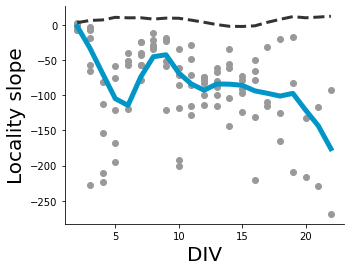

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))

dish_list = ["19880","23312","23280","23311","23317","23302","23282"]
DIV_min_plot = 0 # determine left limit
DIV_max_plot = 23 # right limit

firingrate_thr = 0.03
window_s = 3 # window size for moving average of slope
Nshuffle = 10

locality_slope_arr = np.zeros((len(dish_list),DIV_max_plot-DIV_min_plot))
locality_slope_shuffle_arr = np.zeros((len(dish_list),DIV_max_plot-DIV_min_plot,Nshuffle))

for d in range(len(dish_list)):
    dish = dish_list[d]
    DIV_list = DIV_all[dish]
    date_list = np.where((np.array(firingrate_all[dish]) > firingrate_thr) * (DIV_list < DIV_max_plot) * (DIV_list >= DIV_min_plot))[0]
    ax.scatter([DIV_list[date] for date in date_list], [locality_slope_all[dish][date] for date in date_list], c='#999999')
    
    for date in date_list:
        locality_slope_arr[d,int(DIV_list[date])-DIV_min_plot] = locality_slope_all[dish][date]
        locality_slope_shuffle_arr[d,int(DIV_list[date])-DIV_min_plot,:] = locality_slope_shuffle_all[dish][date][:][0]
        
date_ok = np.where(np.sum(locality_slope_arr,axis=0)!=0)[0]
slope_mean_mvavg = np.zeros(DIV_max_plot) # moving average
slope_shuffle_mean_mvavg = np.zeros(DIV_max_plot) # moving average
mvavg_counter = np.zeros(DIV_max_plot)
for date in date_ok:
    slope_mean_mvavg[max(0,date):date+window_s] += np.sum(locality_slope_arr[locality_slope_arr[:,date]!=0,date])
    slope_shuffle_mean_mvavg[max(0,date):date+window_s] += np.sum(locality_slope_shuffle_arr[locality_slope_arr[:,date]!=0,date,:])
    mvavg_counter[max(0,date):date+window_s] += np.sum(locality_slope_arr[:,date]!=0)

slope_mean_mvavg /= mvavg_counter
slope_shuffle_mean_mvavg /= mvavg_counter*Nshuffle

ax.plot(np.arange(DIV_min_plot, DIV_max_plot)[date_ok], slope_mean_mvavg[date_ok],linewidth=5, color='#0096C8')
ax.plot(np.arange(DIV_min_plot, DIV_max_plot)[date_ok], slope_shuffle_mean_mvavg[date_ok],linewidth=3, color='#333333', linestyle='--')

ax.set_xlabel("DIV", fontsize=20)
ax.set_ylabel("Locality slope", fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([5,10,15,20])

plt.savefig("/root/code/paper_public/figs/fig2D.eps")
plt.show()

Figure 3

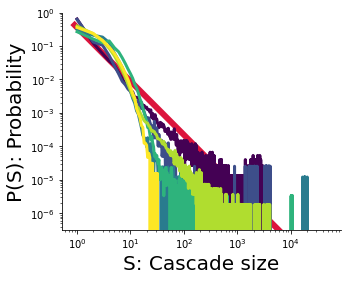

In [20]:
dish = "19880"

size_hist_dish = size_hist_all[dish]
DIV_dish = DIV_all[dish]
date_dish = date_all[dish]

i_list = [1,3,7,11,14,18]

fig, ax = plt.subplots(figsize=(5,4))

a, b, e = NA_abe_all[dish][i_list[-1]]
x_axis = np.arange(0.9, 10000, 1)
ax.plot(x_axis, 10**(b)*x_axis**a, c='crimson', linewidth=6)

for i in i_list[::-1]:
    # ax.plot(np.where(size_hist_dish[i] > 0)[0], size_hist_dish[i][size_hist_dish[i] > 0], label=int(DIV_dish[i]), color=cm.viridis(1-(i-i_list[0])/(i_list[-1]-i_list[0])), linewidth=4)
    ax.plot(np.arange(1, len(size_hist_dish[i])), size_hist_dish[i][1:], label=int(DIV_dish[i]), color=cm.viridis(1-(i-i_list[0])/(i_list[-1]-i_list[0])), linewidth=3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('S: Cascade size', fontsize=20)
ax.set_ylabel('P(S): Probability', fontsize=20)
# ax.set_xlim([10**(-0.1),2e3])
ax.set_ylim([10**(-6.5),1e0])
# plt.savefig("/root/code/paper/figs/fig2_power_formation.eps")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(ncol=2, loc="upper right", frameon=False)
# plt.savefig("/root/code/paper_public/figs/fig3B.eps")
plt.show()

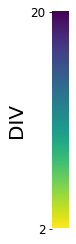

In [60]:
gradient = np.linspace(0, 1, 256)
gradient = np.stack((gradient, gradient))

fig, ax = plt.subplots()
ax.imshow(gradient.T, aspect=0.1, cmap=plt.cm.viridis)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
label_y = ['20', '2']
ax.set_yticks([0, 256], label_y, fontsize=12)
ax.set_ylabel('DIV', fontsize=20)
plt.show()

<ipython-input-62-2f40f5741b59>:32: RuntimeWarning: invalid value encountered in divide
  err_mean_mvavg /= mvavg_counter
<ipython-input-62-2f40f5741b59>:33: RuntimeWarning: invalid value encountered in divide
  exp_mean_mvavg /= mvavg_counter


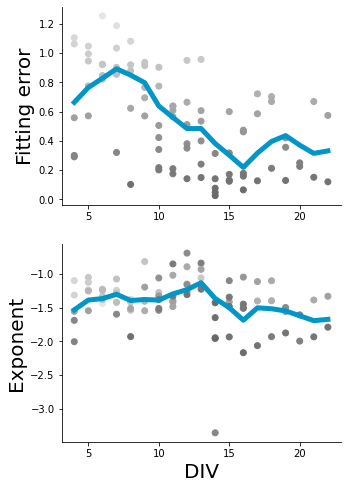

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(5, 8))
ax1, ax2 = axes

dish_list = ["19880","23312","23280","23311","23317","23302","23282"]
firingrate_thr = 0.03
DIV_min_plot = 4 # determine left limit
DIV_max_plot = 23 # right limit
window = 3 # window size for moving average
    
err_array = np.zeros((len(dish_list),DIV_max_plot-DIV_min_plot))
exp_array = np.zeros((len(dish_list),DIV_max_plot-DIV_min_plot))
for d in range(len(dish_list)):
    dish = dish_list[d]
    DIV_list = DIV_all[dish]
    date_list = np.where((np.array(firingrate_all[dish]) > firingrate_thr) * (DIV_list < DIV_max_plot) * (DIV_list >= DIV_min_plot))[0]
    ax1.scatter([DIV_list[date] for date in date_list], [NA_abe_all[dish][date][2] for date in date_list], c=[NA_abe_all[dish][date][2] for date in date_list], cmap='gray', vmin=-1, vmax=1.5)
    ax2.scatter([DIV_list[date] for date in date_list], [NA_abe_all[dish][date][0] for date in date_list], c=[NA_abe_all[dish][date][2] for date in date_list], cmap='gray', vmin=-1, vmax=1.5)
    
    for date in date_list:
        err_array[d,int(DIV_list[date])-DIV_min_plot] = NA_abe_all[dish][date][2]
        exp_array[d,int(DIV_list[date])-DIV_min_plot] = NA_abe_all[dish][date][0]

date_ok = np.where(np.sum(err_array,axis=0)!=0)[0]
err_mean_mvavg = np.zeros(DIV_max_plot) # moving average
exp_mean_mvavg = np.zeros(DIV_max_plot) # moving average
mvavg_counter = np.zeros(DIV_max_plot)
for date in date_ok:
    err_mean_mvavg[max(0,date):date+window] += np.sum(err_array[err_array[:,date]!=0,date])
    exp_mean_mvavg[max(0,date):date+window] += np.sum(exp_array[exp_array[:,date]!=0,date])
    mvavg_counter[max(0,date):date+window] += np.sum(err_array[:,date]!=0)

err_mean_mvavg /= mvavg_counter
exp_mean_mvavg /= mvavg_counter

ax1.plot(np.arange(DIV_min_plot, DIV_max_plot)[date_ok], err_mean_mvavg[date_ok],linewidth=5, color='#0096C8')
ax2.plot(np.arange(DIV_min_plot, DIV_max_plot)[date_ok], exp_mean_mvavg[date_ok],linewidth=5, color='#0096C8')

ax1.set_ylabel("Fitting error", fontsize=20)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks([5,10,15,20])

ax2.set_xlabel("DIV", fontsize=20)
ax2.set_ylabel("Exponent", fontsize=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks([5,10,15,20])
plt.show()

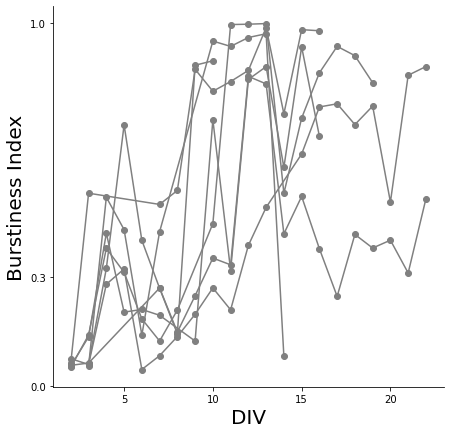

In [40]:
dish_list = ["19880","23312","23280","23311","23317","23302","23282"]
firingrate_thr = 0.03

DIV_min_plot = 0 # plotの右端を決める
DIV_max_plot = 23 # plotの右端を決める

fig, ax = plt.subplots(figsize=(7,7))

for d in np.arange(len(dish_list)):
    dish = dish_list[d]
    DIV_list = DIV_all[dish]
    date_list = np.where((np.array(firingrate_all[dish]) > firingrate_thr) * (DIV_list < DIV_max_plot) * (DIV_list >= DIV_min_plot))[0]
    ax.plot([DIV_list[date] for date in date_list], [burstiness_all[dish][date] for date in date_list], color='gray', marker='o')
  
ax.set_xlabel('DIV', fontsize=20)
ax.set_ylabel('Burstiness Index', fontsize=20)
fig.patch.set_alpha(0)  # Figure全体の背景を透明に
ax.patch.set_alpha(0)   # Axes（プロット部分）の背景を透明に
ax.set_xticks([5,10,15,20])
ax.set_yticks([0.,0.3,1.0])

plt.show()

3.0
15.0


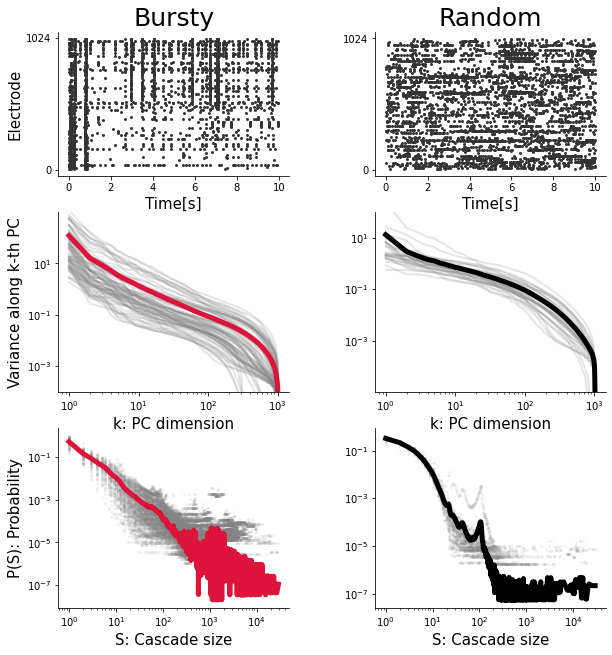

In [110]:
dish_list = ["19880","23312","23280","23311","23317","23302","23282"]
firingrate_thr = 0.03
DIV_min_plot = 0 # plotの右端を決める
DIV_max_plot = 23 # plotの右端を決める

fig = plt.figure(figsize=(8, 10))
ax1 = fig.add_axes([0.00, 0.65, 0.4, 0.2])  # [left, bottom, width, height]
ax2 = fig.add_axes([0.55, 0.65, 0.4, 0.2])
ax3 = fig.add_axes([0.00, 0.35, 0.4, 0.25])
ax4 = fig.add_axes([0.55, 0.35, 0.4, 0.25])
ax5 = fig.add_axes([0.00, 0.05, 0.4, 0.25])
ax6 = fig.add_axes([0.55, 0.05, 0.4, 0.25])

dish = "23312"
DIV_list = DIV_all[dish]
date_list = date_all[dish]
i_list = [1,10]
bin = 100

raster_time = 10 # [s]
times_list = []
channs_list = []

for i in range(len(i_list)):
    i_plot = i_list[i]
    date = date_list[i_plot]
    DIV = DIV_list[i_plot]
    print(DIV)
    
    path = f'/mnt/cerebellum/akita/development/data/{dish}/{date}/record.raw.h5'
    record = File(path)
    T = (record['data_store/data0000/stop_time'][0] - record['data_store/data0000/start_time'][0])/1000
    N = 1024
    times = np.array(pd.DataFrame(np.array(record['data_store/data0000/spikes']))['frameno']/20000)
    times -= times[0]
    channs = np.array(pd.DataFrame(np.array(record['data_store/data0000/spikes']))['channel'])
    
    nspike = np.sum(times < raster_time)
    times_list.append(times[:nspike])
    channs_list.append(channs[:nspike])
    
ax2.scatter(times_list[0],channs_list[0], s=15, marker=".", c='#333333')
ax1.scatter(times_list[1],channs_list[1], s=15, marker=".", c='#333333')

llim = 0.3
alpha_var = 0.2
alpha_size = 0.1

varspec_random = []
varspec_bursty = []
size_hist_random = []
size_hist_bursty = []
Dim_error_random = []
Dim_error_bursty = []
NA_error_random = []
NA_error_bursty = []

x_axis = np.arange(1,N+1)

for d in np.arange(len(dish_list)):
    dish = dish_list[d]
    varspec_dish = varspec_all[dish]
    size_hist_dish = size_hist_all[dish]
    DIV_dish = DIV_all[dish]
    
    for i in range(len(DIV_dish)):
        if firingrate_all[dish][i] > firingrate_thr:
            index = burstiness_all[dish][i]
            if index > llim:
                varspec_bursty.append(varspec_dish[i])
                Dim_error_bursty.append(Dim_abe_all[dish][i][2])
                size_hist_bursty.append(size_hist_dish[i])
                NA_error_bursty.append(NA_abe_all[dish][i][2])
                ax3.plot(x_axis, varspec_dish[i], label=DIV_dish[i], color='gray', linewidth=2, alpha=alpha_var)
                ax5.scatter(np.where(size_hist_dish[i]>0)[0], size_hist_dish[i][size_hist_dish[i]>0], label=DIV_dish[i], color='gray', linewidth=2, alpha=alpha_size, s=1)     
            else:
                varspec_random.append(varspec_dish[i])
                Dim_error_random.append(Dim_abe_all[dish][i][2])
                size_hist_random.append(size_hist_dish[i])
                NA_error_random.append(NA_abe_all[dish][i][2])
                ax4.plot(x_axis, varspec_dish[i], label=DIV_dish[i], color='gray', linewidth=2, alpha=alpha_var)
                ax6.scatter(np.where(size_hist_dish[i]>0)[0], size_hist_dish[i][size_hist_dish[i]>0], label=DIV_dish[i], color='gray', linewidth=2, alpha=alpha_size, s=1)            


ax3.plot(x_axis, np.mean(varspec_bursty,axis=0), linewidth=5, color='crimson')
ax5.plot(np.where(np.mean(size_hist_bursty,axis=0)>0)[0], np.mean(size_hist_bursty,axis=0)[np.mean(size_hist_bursty,axis=0)>0], linewidth=5, color='crimson')

ax4.plot(x_axis, np.mean(varspec_random,axis=0), linewidth=5, color='black')
ax6.plot(np.where(np.mean(size_hist_random,axis=0)>0)[0], np.mean(size_hist_random,axis=0)[np.mean(size_hist_random,axis=0)>0], linewidth=5, color='black')

axs = [[ax1,ax2],[ax3,ax4],[ax5,ax6]]
for j in [0,1]:
    axs[0][j].set_xlabel(f'Time[s]',fontsize=15)
    axs[0][j].set_yticks([0,1024])
    axs[1][j].set_xscale('log')
    axs[1][j].set_yscale('log')
    axs[1][j].set_xlabel(f'k: PC dimension',fontsize=15)
    axs[1][j].set_yticks([1e-3,1e-1,1e1])
    axs[1][j].yaxis.set_minor_locator(NullLocator())
    axs[2][j].set_xscale('log')
    axs[2][j].set_yscale('log')
    axs[2][j].set_xlabel(f'S: Cascade size',fontsize=15)
    axs[2][j].set_yticks([1e-7,1e-5,1e-3,1e-1])
    axs[2][j].yaxis.set_minor_locator(NullLocator())
        
for i in [0,1,2]:
    for j in [0,1]:
        axs[i][j].spines['top'].set_visible(False)
        axs[i][j].spines['right'].set_visible(False)
        axs[i][j].patch.set_alpha(0)

ax1.set_title('Bursty',fontsize=25)
ax1.set_ylabel('Electrode',fontsize=15)
ax2.set_title('Random',fontsize=25)
ax3.set_ylabel('Variance along k-th PC',fontsize=15)
ax3.set_ylim([1e-4,1e3])
ax4.set_ylim([1e-5,1e2])
ax5.set_ylabel('P(S): Probability',fontsize=15)

plt.show()

In [107]:
stat, p_value = mannwhitneyu(Dim_error_bursty, Dim_error_random)
print("U統計量:", stat)
print("p値:", p_value)

stat, p_value = mannwhitneyu(NA_error_bursty, NA_error_random)
print("U統計量:", stat)
print("p値:", p_value)

U統計量: 784.0
p値: 0.0007211919225655806
U統計量: 961.0
p値: 0.023590479938436108


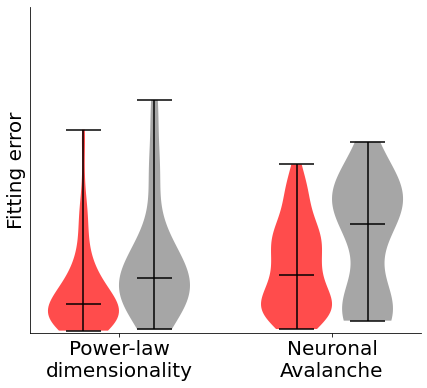

In [108]:
fig, ax = plt.subplots(figsize=(7,6))

const_Dim = 2*np.median(Dim_error_random)
const_NA = np.median(NA_error_random)

positions = [1,1.5,2.5,3]
parts = plt.violinplot([Dim_error_bursty/const_Dim, Dim_error_random/const_Dim, NA_error_bursty/const_NA, NA_error_random/const_NA], positions=positions, showmedians=True)
colors = ['red', 'gray', 'red', 'gray']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('none')
    pc.set_alpha(0.7)
    
parts['cmins'].set_color('black')
parts['cmaxes'].set_color('black')
parts['cmedians'].set_color('black')
parts['cbars'].set_color('black')

label_x = ['Power-law\ndimensionality', 'Neuronal\nAvalanche']
ax.set_xticks([1.25, 2.75], label_x, fontsize=20)
ax.set_yticks([])
ax.set_ylim([0,3])
ax.set_ylabel('Fitting error', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()